In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/asrit/Downloads/heart_2020_cleaned.csv/heart_2020_cleaned.csv')

# Display the first few rows
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)


  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1       

In [2]:
# Summary statistics for continuous variables
continuous_summary = {
    'Variable': [],
    'Mean': [],
    'Median': [],
    'Mode': [],
    'Min': [],
    'Max': [],
}

for col in ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']:
    continuous_summary['Variable'].append(col)
    continuous_summary['Mean'].append(df[col].mean())
    continuous_summary['Median'].append(df[col].median())
    continuous_summary['Mode'].append(df[col].mode()[0])
    continuous_summary['Min'].append(df[col].min())
    continuous_summary['Max'].append(df[col].max())

continuous_summary_df = pd.DataFrame(continuous_summary)
print(continuous_summary_df)


         Variable       Mean  Median   Mode    Min    Max
0             BMI  28.325399   27.34  26.63  12.02  94.85
1  PhysicalHealth   3.371710    0.00   0.00   0.00  30.00
2    MentalHealth   3.898366    0.00   0.00   0.00  30.00
3       SleepTime   7.097075    7.00   7.00   1.00  24.00


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Summary counts for categorical variables
categorical_summary = {}

for col in ['HeartDisease', 'PhysicalActivity', 'GenHealth', 'AgeCategory', 
            'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 
            'Sex', 'Diabetic', 'Asthma', 'KidneyDisease', 'SkinCancer']:
    categorical_summary[col] = df[col].value_counts()

categorical_summary_df = pd.DataFrame(categorical_summary)
print(categorical_summary_df)


                         HeartDisease  PhysicalActivity  GenHealth  \
18-24                             NaN               NaN        NaN   
25-29                             NaN               NaN        NaN   
30-34                             NaN               NaN        NaN   
35-39                             NaN               NaN        NaN   
40-44                             NaN               NaN        NaN   
45-49                             NaN               NaN        NaN   
50-54                             NaN               NaN        NaN   
55-59                             NaN               NaN        NaN   
60-64                             NaN               NaN        NaN   
65-69                             NaN               NaN        NaN   
70-74                             NaN               NaN        NaN   
75-79                             NaN               NaN        NaN   
80 or older                       NaN               NaN        NaN   
Excellent           

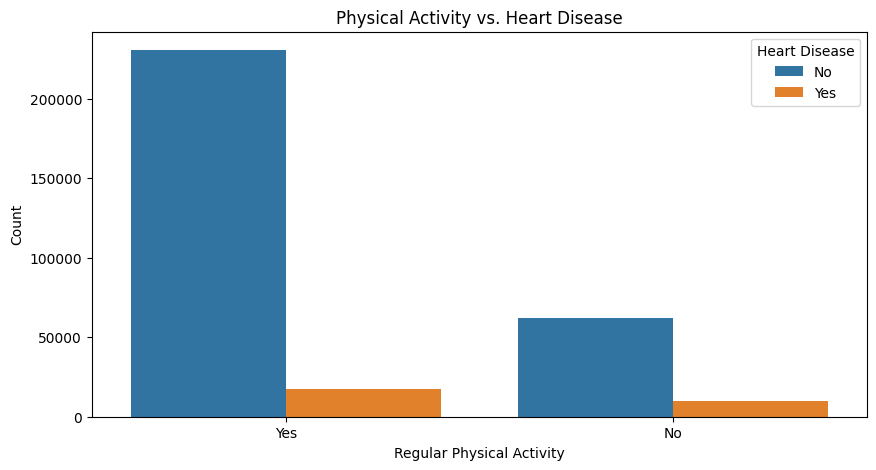

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="PhysicalActivity", hue="HeartDisease")
plt.title("Physical Activity vs. Heart Disease")
plt.xlabel("Regular Physical Activity")
plt.ylabel("Count")
plt.legend(title="Heart Disease")
plt.show()


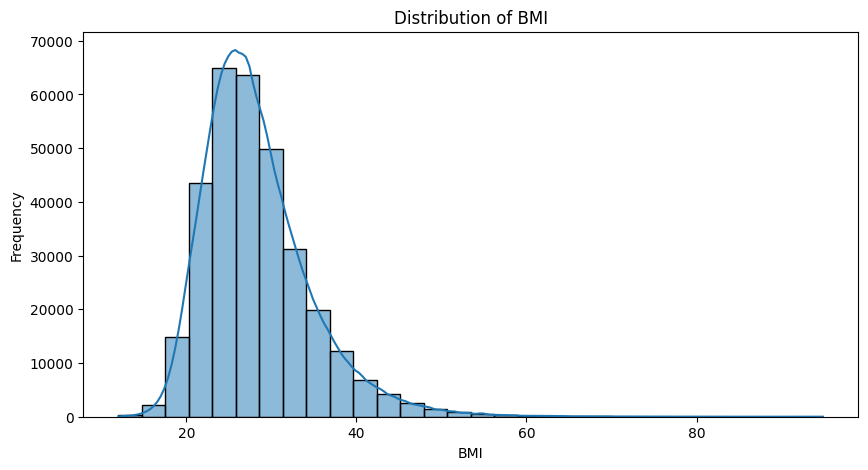

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df["BMI"], kde=True, bins=30)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()


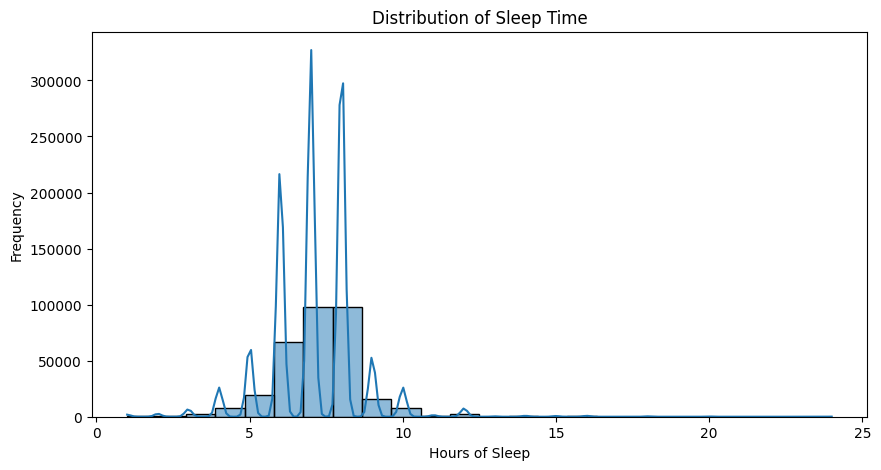

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(df["SleepTime"], kde=True, bins=24)
plt.title("Distribution of Sleep Time")
plt.xlabel("Hours of Sleep")
plt.ylabel("Frequency")
plt.show()


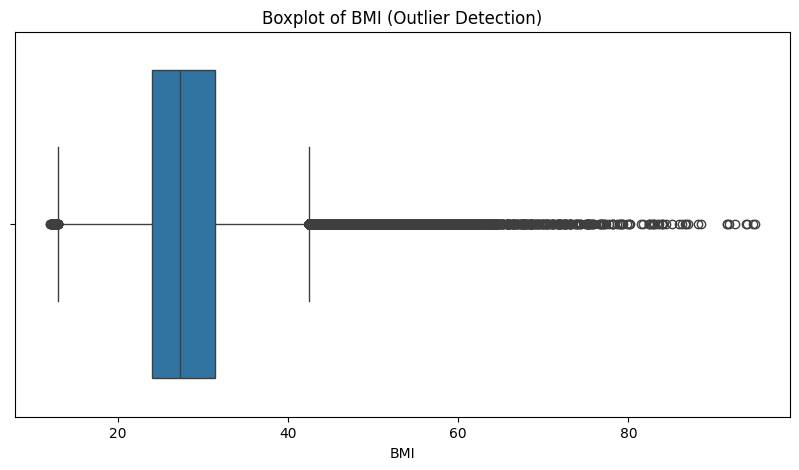

In [10]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["BMI"])
plt.title("Boxplot of BMI (Outlier Detection)")
plt.xlabel("BMI")
plt.show()


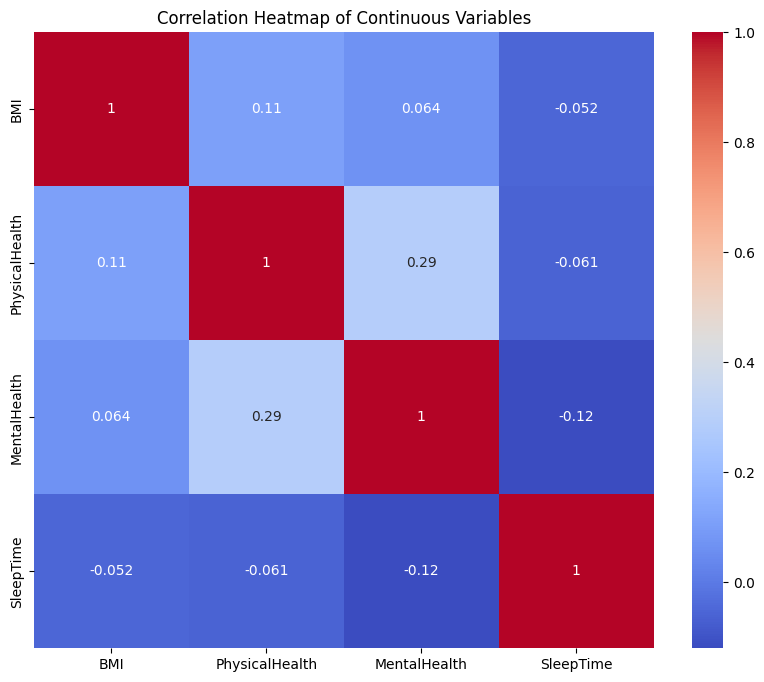

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Continuous Variables")
plt.show()


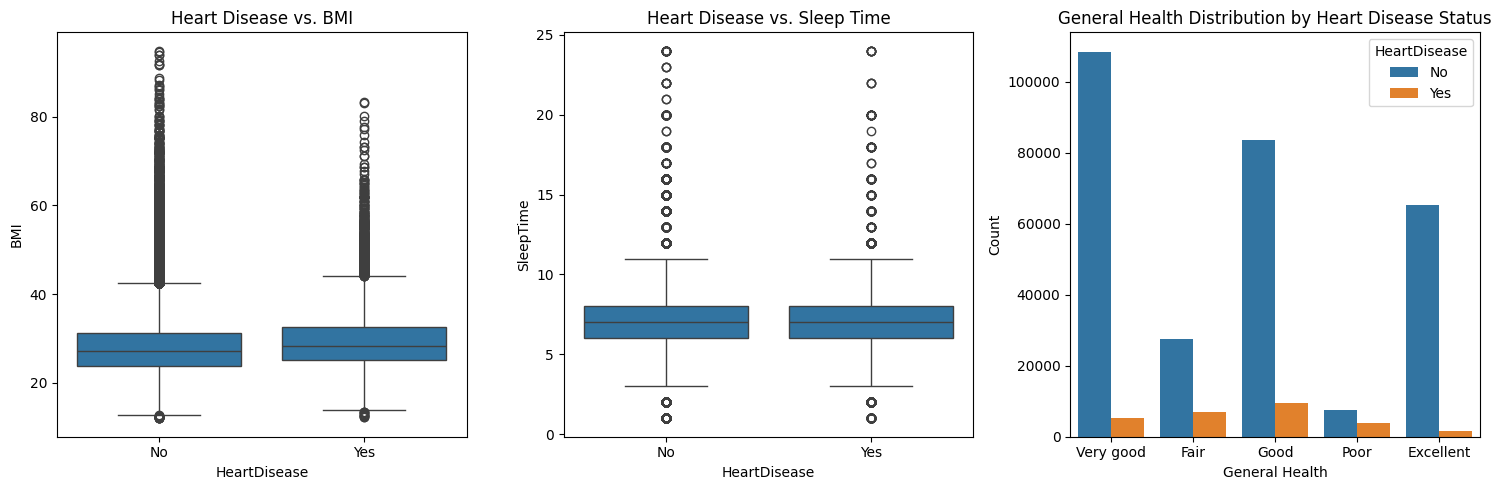

In [12]:
plt.figure(figsize=(15, 5))

# BMI
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x="HeartDisease", y="BMI")
plt.title("Heart Disease vs. BMI")

# GenHealth
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x="HeartDisease", y="SleepTime")
plt.title("Heart Disease vs. Sleep Time")

# General Health Distribution by Heart Disease Status
plt.subplot(1, 3, 3)
sns.countplot(data=df, x="GenHealth", hue="HeartDisease")
plt.title("General Health Distribution by Heart Disease Status")
plt.xlabel("General Health")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


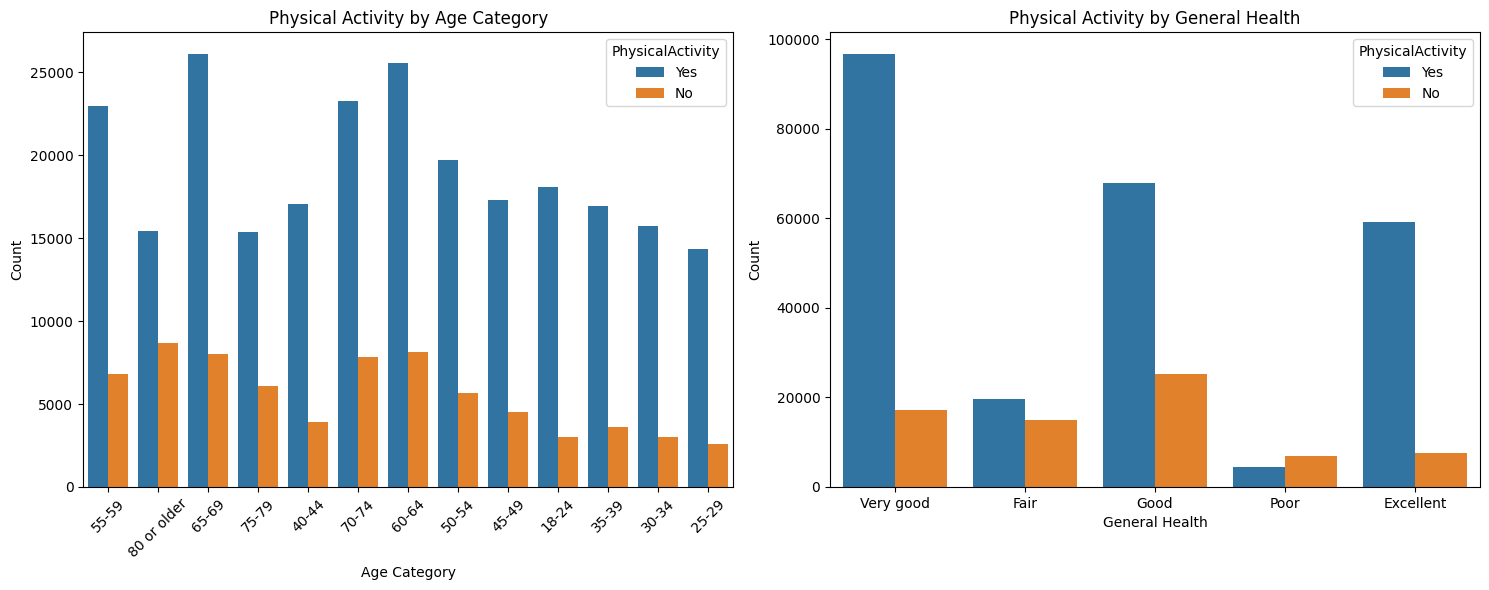

In [13]:
plt.figure(figsize=(15, 6))

# Physical Activity by AgeCategory
plt.subplot(1, 2, 1)
sns.countplot(data=df, x="AgeCategory", hue="PhysicalActivity")
plt.title("Physical Activity by Age Category")
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Physical Activity by GenHealth
plt.subplot(1, 2, 2)
sns.countplot(data=df, x="GenHealth", hue="PhysicalActivity")
plt.title("Physical Activity by General Health")
plt.xlabel("General Health")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


# Non-Confounding Factors

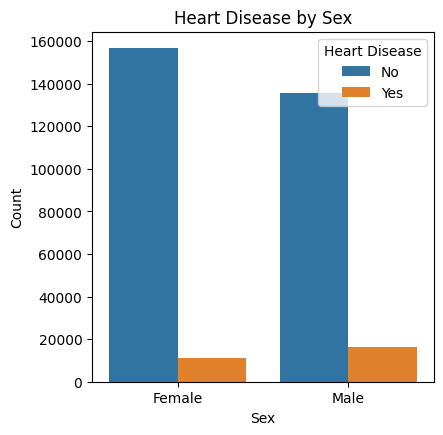

In [14]:
plt.figure(figsize=(15, 10))

# Heart Disease by Sex
plt.subplot(2, 3, 1)
sns.countplot(data=df, x="Sex", hue="HeartDisease")
plt.title("Heart Disease by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Heart Disease")

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'White'),
  Text(1, 0, 'Black'),
  Text(2, 0, 'Asian'),
  Text(3, 0, 'American Indian/Alaskan Native'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Hispanic')])

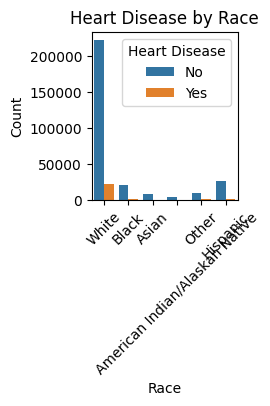

In [15]:
# Heart Disease by Race
plt.subplot(2, 3, 2)
sns.countplot(data=df, x="Race", hue="HeartDisease")
plt.title("Heart Disease by Race")
plt.xlabel("Race")
plt.ylabel("Count")
plt.legend(title="Heart Disease")
plt.xticks(rotation=45)

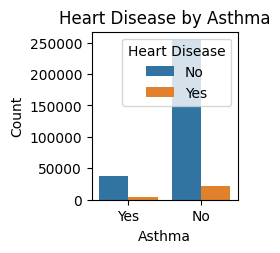

In [16]:
# Heart Disease by Asthma
plt.subplot(2, 3, 3)
sns.countplot(data=df, x="Asthma", hue="HeartDisease")
plt.title("Heart Disease by Asthma")
plt.xlabel("Asthma")
plt.ylabel("Count")
plt.legend(title="Heart Disease")

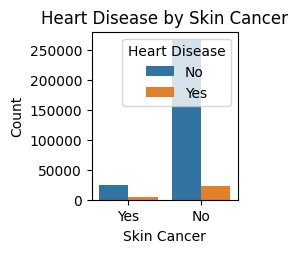

In [17]:
# Heart Disease by Skin Cancer
plt.subplot(2, 3, 4)
sns.countplot(data=df, x="SkinCancer", hue="HeartDisease")
plt.title("Heart Disease by Skin Cancer")
plt.xlabel("Skin Cancer")
plt.ylabel("Count")
plt.legend(title="Heart Disease")

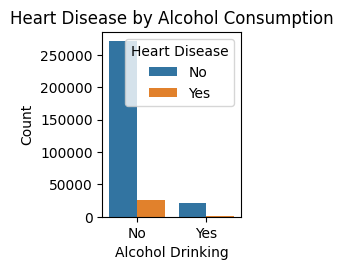

In [18]:
# Heart Disease by Alcohol Consumption
plt.subplot(2, 3, 5)
sns.countplot(data=df, x="AlcoholDrinking", hue="HeartDisease")
plt.title("Heart Disease by Alcohol Consumption")
plt.xlabel("Alcohol Drinking")
plt.ylabel("Count")
plt.legend(title="Heart Disease")

plt.tight_layout()
plt.show()